# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to see what features affects the price of the house at sales the most.

## Executive Summary

### Contents:
- [1. Importing of libraries](#1.-Importing-of-Libraries)
- [2. Importing Datasets](#2.-Importing-of-Datasets)
- [3. Manual Check of Dataset](#3.-Manual-Check-of-Dataset)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. Exploratory Data Analysis(EDA)](#5.-Exploratory-Data-Analysis(EDA))


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 1. Importing of Libraries

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

# 2. Importing of Datasets

In [3]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_train.shape , df_test.shape

((2051, 81), (879, 80))

# 3. Manual Check of Dataset

In [4]:
list(set(df_train) - set(df_test)) # checking difference between train and test dataset

['SalePrice']

In [5]:
#adding Saleprice column to test dataframe to combine the 2 dataset for analysis
df_test['SalePrice'] = 0

In [6]:
print(list(set(df_train) - set(df_test))) # checking difference between train and test dataset again
df_train.shape , df_test.shape

[]


((2051, 81), (879, 81))

In [7]:
df = pd.concat([df_train, df_test], ignore_index=False, sort=False, axis = 0)
df.shape

(2930, 81)

## 3.1 first 20 columns of data

In [8]:
df.iloc[:,:20].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8


In [9]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2930 non-null   int64  
 1   PID           2930 non-null   int64  
 2   MS SubClass   2930 non-null   int64  
 3   MS Zoning     2930 non-null   object 
 4   Lot Frontage  2440 non-null   float64
 5   Lot Area      2930 non-null   int64  
 6   Street        2930 non-null   object 
 7   Alley         198 non-null    object 
 8   Lot Shape     2930 non-null   object 
 9   Land Contour  2930 non-null   object 
 10  Utilities     2930 non-null   object 
 11  Lot Config    2930 non-null   object 
 12  Land Slope    2930 non-null   object 
 13  Neighborhood  2930 non-null   object 
 14  Condition 1   2930 non-null   object 
 15  Condition 2   2930 non-null   object 
 16  Bldg Type     2930 non-null   object 
 17  House Style   2930 non-null   object 
 18  Overall Qual  2930 non-null  

In [10]:
df.iloc[:,:20].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2930,NaN,NaN,NaN,1465.5,845.962,1,733.25,1465.5,2197.75,2930
PID,2930,NaN,NaN,NaN,7.14464e+08,1.88731e+08,5.26301e+08,5.28477e+08,5.35454e+08,9.07181e+08,1.0071e+09
MS SubClass,2930,NaN,NaN,NaN,57.3874,42.638,20,20,50,70,190
MS Zoning,2930,7,RL,2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2440,NaN,NaN,NaN,69.2246,23.3653,21,58,68,80,313
Lot Area,2930,NaN,NaN,NaN,10147.9,7880.02,1300,7440.25,9436.5,11555.2,215245
Street,2930,2,Pave,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2930,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2930,4,Lvl,2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- "PID" seems to be an unknown data to explained on the Data Dictionary.
- Missing datas:
  - Lot Frontage, float
  - Alley, object
- No Negative values noted

## 3.2. Second 20 columns


In [11]:
#Checking 2nd 20 columns of data
df.iloc[:, 20:40].head()

,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0
1,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0
2,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0
3,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0
4,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0


In [12]:
#checking for data types and null objects.
df.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2930 non-null   int64  
 1   Year Remod/Add  2930 non-null   int64  
 2   Roof Style      2930 non-null   object 
 3   Roof Matl       2930 non-null   object 
 4   Exterior 1st    2930 non-null   object 
 5   Exterior 2nd    2930 non-null   object 
 6   Mas Vnr Type    2907 non-null   object 
 7   Mas Vnr Area    2907 non-null   float64
 8   Exter Qual      2930 non-null   object 
 9   Exter Cond      2930 non-null   object 
 10  Foundation      2930 non-null   object 
 11  Bsmt Qual       2850 non-null   object 
 12  Bsmt Cond       2850 non-null   object 
 13  Bsmt Exposure   2847 non-null   object 
 14  BsmtFin Type 1  2850 non-null   object 
 15  BsmtFin SF 1    2929 non-null   float64
 16  BsmtFin Type 2  2849 non-null   object 
 17  BsmtFin SF 2    2929 non-null   fl

In [13]:
df.iloc[:, 20:40].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year Built,2930,NaN,NaN,NaN,1971.36,30.2454,1872,1954,1973,2001,2010
Year Remod/Add,2930,NaN,NaN,NaN,1984.27,20.8603,1950,1965,1993,2004,2010
Roof Style,2930,6,Gable,2321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Matl,2930,8,CompShg,2887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 1st,2930,16,VinylSd,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 2nd,2930,17,VinylSd,1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,2907,5,None,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,2907,NaN,NaN,NaN,101.897,179.113,0,0,0,164,1600
Exter Qual,2930,4,TA,1799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exter Cond,2930,5,TA,2549,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Mas Vnr Type, object
  - Mas Vnr Area, float64
  - Bsmt Qual, object
  - Bsmt Cond,object
  - Bsmt Exposure, object
  - BsmtFin Type 1, object
  - BsmtFin SF 1, float64
  - BsmtFin Type 2, object
  - BsmtFin SF 2, float64
  - Bsmt Unf SF, float64
  - Total Bsmt SF, float64
- No Negative values noted

## 3.3. Third 20 columns

In [14]:
# checking third 20 columns
df.iloc[:, 40:60].head()

,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [15]:
# checking dtypes and null values
df.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Heating          2930 non-null   object 
 1   Heating QC       2930 non-null   object 
 2   Central Air      2930 non-null   object 
 3   Electrical       2929 non-null   object 
 4   1st Flr SF       2930 non-null   int64  
 5   2nd Flr SF       2930 non-null   int64  
 6   Low Qual Fin SF  2930 non-null   int64  
 7   Gr Liv Area      2930 non-null   int64  
 8   Bsmt Full Bath   2928 non-null   float64
 9   Bsmt Half Bath   2928 non-null   float64
 10  Full Bath        2930 non-null   int64  
 11  Half Bath        2930 non-null   int64  
 12  Bedroom AbvGr    2930 non-null   int64  
 13  Kitchen AbvGr    2930 non-null   int64  
 14  Kitchen Qual     2930 non-null   object 
 15  TotRms AbvGrd    2930 non-null   int64  
 16  Functional       2930 non-null   object 
 17  Fireplaces     

In [16]:
df.iloc[:, 40:60].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Heating,2930,6,GasA,2885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heating QC,2930,5,Ex,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Air,2930,2,Y,2734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,2929,5,SBrkr,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,2930,NaN,NaN,NaN,1159.56,391.891,334,876.25,1084,1384,5095
2nd Flr SF,2930,NaN,NaN,NaN,335.456,428.396,0,0,0,703.75,2065
Low Qual Fin SF,2930,NaN,NaN,NaN,4.67679,46.3105,0,0,0,0,1064
Gr Liv Area,2930,NaN,NaN,NaN,1499.69,505.509,334,1126,1442,1742.75,5642
Bsmt Full Bath,2928,NaN,NaN,NaN,0.431352,0.52482,0,0,0,1,3
Bsmt Half Bath,2928,NaN,NaN,NaN,0.0611339,0.245254,0,0,0,0,2


### 3.3. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Bsmt Full Bath, float64
  - Bsmt Half Bath, float 64
  - Fireplace Qu, object
  - Garage Type, object
- No Negative values noted

## 3.4. last 21 columns

In [17]:
# checking last 21 columns
df.iloc[:, 60:].head()

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [18]:
df.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Garage Yr Blt   2771 non-null   float64
 1   Garage Finish   2771 non-null   object 
 2   Garage Cars     2929 non-null   float64
 3   Garage Area     2929 non-null   float64
 4   Garage Qual     2771 non-null   object 
 5   Garage Cond     2771 non-null   object 
 6   Paved Drive     2930 non-null   object 
 7   Wood Deck SF    2930 non-null   int64  
 8   Open Porch SF   2930 non-null   int64  
 9   Enclosed Porch  2930 non-null   int64  
 10  3Ssn Porch      2930 non-null   int64  
 11  Screen Porch    2930 non-null   int64  
 12  Pool Area       2930 non-null   int64  
 13  Pool QC         13 non-null     object 
 14  Fence           572 non-null    object 
 15  Misc Feature    106 non-null    object 
 16  Misc Val        2930 non-null   int64  
 17  Mo Sold         2930 non-null   in

In [19]:
df.iloc[:, 60:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Garage Yr Blt,2771,NaN,NaN,NaN,1978.13,25.5284,1895,1960,1979,2002,2207
Garage Finish,2771,3,Unf,1231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cars,2929,NaN,NaN,NaN,1.76681,0.760566,0,1,2,2,5
Garage Area,2929,NaN,NaN,NaN,472.82,215.047,0,320,480,576,1488
Garage Qual,2771,5,TA,2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cond,2771,5,TA,2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paved Drive,2930,3,Y,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood Deck SF,2930,NaN,NaN,NaN,93.7519,126.362,0,0,0,168,1424
Open Porch SF,2930,NaN,NaN,NaN,47.5334,67.4834,0,0,27,70,742
Enclosed Porch,2930,NaN,NaN,NaN,23.0116,64.1391,0,0,0,0,1012


### 3.4. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Garage Yr Blt, float64
  -  Garage Finish, object
  - Garage Cars, float64
  - Garage Area, float 64
  - Garage Qual, object
  - Garage Cond, object
  - Pool QC, object
  - Fence, object
  - Misc Feature, object
- No Negative values noted

# 4. Data Cleaning

### 4.1 Counting the missing values

In [20]:
#checking the count and list of nan values
nan_values = df.isna().sum().sort_values(ascending = False)
nan_values_list = nan_values[nan_values >= 1]
nan_values_list

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Cond        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Garage Cars          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
dtype: int64

### 4.1. comments
Missing values above will either be removed or filled in after manual inspection with data dictionary

# 4.2. Filling Missing values

## 4.2.1 Filling Missing values in Pool QC
- Base on data dictionary, empty values suppose to be houses without pools
- Thus the information will need to be filled in

In [21]:
#importing datasets without NA filter
df_train_nona = pd.read_csv('../datasets/train.csv', na_filter = False)
df_test_nona = pd.read_csv('../datasets/test.csv', na_filter = False)
df_nona = pd.concat([df_train_nona, df_test_nona], ignore_index=False, sort=False, axis = 0)
df_nona.isna().sum().sum()

879

Missing data belongs to Test data set with no sale price data

In [22]:
#checking for unique values
df['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [23]:
#checking for unique values
df_nona['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [24]:
#replacing nan value with NA for Pool QC
df['Pool QC'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [25]:
df['Pool QC'].isna().sum()

0

### 4.2.1 comments: 
All missing values in 'Pool QC' has been filled

## 4.2.2 Filling missing values in Misc Feature
- base on data dictionary, missing values should be house without misc feature
- thus information will need to be filled in

In [26]:
#checking for unique values
df['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [27]:
#checking for unique values
df_nona['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [28]:
#replacing nan value with NA for Misc Feature
df['Misc Feature'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [29]:
df['Misc Feature'].isna().sum()

0

### 4.2.2 comments: 
All missing values in 'Misc Feature' has been filled

## 4.2.3 Filling missing values in Alley category
- base on data dictionary, missing values should be house without alley access
- thus information will need to be filled in

In [30]:
#checking for unique values
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [31]:
#checking for unique values
df_nona['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [32]:
#replacing nan value with NA for Alley
df['Alley'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [33]:
df['Alley'].isna().sum()

0

### 4.2.3 comments: 
All missing values in 'Alley' has been filled

## 4.2.4 Filling missing values in Fence category
- base on data dictionary, missing values should be house without fence
- thus information will need to be filled in

In [34]:
#checking for unique values
df['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [35]:
#checking for unique values
df_nona['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [36]:
#replacing nan value with NA for Alley
df['Fence'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [37]:
df['Fence'].isna().sum()

0

### 4.2.4 comments: 
All missing values in 'Fence' has been filled

## 4.2.5 Filling missing values in Fireplace QU
- base on data dictionary, missing values should be house without fireplaces
- thus information will need to be filled in

In [38]:
#checking for unique values
df['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [39]:
#checking for unique values
df_nona['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [40]:
#replacing nan value with NA for Alley
df['Fireplace Qu'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [41]:
df['Fence'].isna().sum()

0

### 4.2.5 comments: 
All missing values in 'Fireplace QU' has been filled

## 4.2.6 Filling missing values in Lot Frontage
- base on data dictionary, missing values should be Linear feet of street connected to property
- adding in 0 for missing values to keep the datatype as a float

In [42]:
#checking for null values
df['Lot Frontage'].isnull().sum()

490

In [43]:
#replacing nan value with 0 for Lot Frontage
df['Lot Frontage'].fillna(0, inplace = True)

In [44]:
#checking for null values
df['Lot Frontage'].isnull().sum()

0

### 4.2.6 comments: 
All missing values in 'Lot Frontage' has been filled

# 4.2.7 Handling Garage related columns

In [45]:
#Filtering Garage related columns
df_garage = df.filter(regex='Garage')
df_garage.isna().sum()

Garage Type      157
Garage Yr Blt    159
Garage Finish    159
Garage Cars        1
Garage Area        1
Garage Qual      159
Garage Cond      159
dtype: int64

In [46]:
#checking dtypes
df_garage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2773 non-null   object 
 1   Garage Yr Blt  2771 non-null   float64
 2   Garage Finish  2771 non-null   object 
 3   Garage Cars    2929 non-null   float64
 4   Garage Area    2929 non-null   float64
 5   Garage Qual    2771 non-null   object 
 6   Garage Cond    2771 non-null   object 
dtypes: float64(3), object(4)
memory usage: 183.1+ KB


- 'Garage Type', 'Garage Finish', 'Garage Qual' and 'Garage Cond'should have NA values in them.
- 'Garage Yr Blt' refers to year Garage is built, so a number need to be insert for dtype to remain float
- Garage cars and Garage area denotes the number of car and area size of garade, therefore a number need to be filled in for nan values

In [47]:
#filling dtypes object nan values
df['Garage Type'].fillna('NA', inplace = True)
df['Garage Finish'].fillna('NA', inplace = True)
df['Garage Qual'].fillna('NA', inplace = True)
df['Garage Cond'].fillna('NA', inplace = True)

#filling dtypes float64 nan values with number 0
df['Garage Yr Blt'].fillna(0 , inplace = True)
df['Garage Cars'].fillna(0 , inplace = True)
df['Garage Area'].fillna(0 , inplace = True)

In [48]:
df_garage = df.filter(regex='Garage')
df_garage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2930 non-null   object 
 1   Garage Yr Blt  2930 non-null   float64
 2   Garage Finish  2930 non-null   object 
 3   Garage Cars    2930 non-null   float64
 4   Garage Area    2930 non-null   float64
 5   Garage Qual    2930 non-null   object 
 6   Garage Cond    2930 non-null   object 
dtypes: float64(3), object(4)
memory usage: 183.1+ KB


### 4.2.7. Comments

All missing values in Garage category has been filled

# 4.2.8 Handling Basement related columns

In [49]:
df_bsmt = df.filter(regex='Bsmt')
df_bsmt.isnull().sum()

Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [50]:
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2850 non-null   object 
 1   Bsmt Cond       2850 non-null   object 
 2   Bsmt Exposure   2847 non-null   object 
 3   BsmtFin Type 1  2850 non-null   object 
 4   BsmtFin SF 1    2929 non-null   float64
 5   BsmtFin Type 2  2849 non-null   object 
 6   BsmtFin SF 2    2929 non-null   float64
 7   Bsmt Unf SF     2929 non-null   float64
 8   Total Bsmt SF   2929 non-null   float64
 9   Bsmt Full Bath  2928 non-null   float64
 10  Bsmt Half Bath  2928 non-null   float64
dtypes: float64(6), object(5)
memory usage: 274.7+ KB


In [51]:
df.loc[df['BsmtFin SF 1'].isna() == True].filter(regex = 'Bsmt')

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath,Bsmt Half Bath has values as float, which are all regarding measurements, missing values to fill in as 0
- Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2 are all values with categories, like quality and conditions of basement. missing values to be filled with NA.
- column 1327 have all Bsmt categories has missing values, most likely do not have basement

In [52]:
#filling dtypes object nan values
df['Bsmt Qual'].fillna('NA', inplace = True)
df['Bsmt Cond'].fillna('NA', inplace = True)
df['Bsmt Exposure'].fillna('NA', inplace = True)
df['BsmtFin Type 1'].fillna('NA', inplace = True)
df['BsmtFin Type 2'].fillna('NA', inplace = True)

#filling dtypes float64 nan values with number 0
df['BsmtFin SF 1'].fillna(0 , inplace = True)
df['BsmtFin SF 2'].fillna(0 , inplace = True)
df['Bsmt Unf SF'].fillna(0 , inplace = True)
df['Total Bsmt SF'].fillna(0 , inplace = True)
df['Bsmt Full Bath'].fillna(0 , inplace = True)
df['Bsmt Half Bath'].fillna(0 , inplace = True)

In [53]:
df_bsmt = df.filter(regex='Bsmt')
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2930 non-null   object 
 1   Bsmt Cond       2930 non-null   object 
 2   Bsmt Exposure   2930 non-null   object 
 3   BsmtFin Type 1  2930 non-null   object 
 4   BsmtFin SF 1    2930 non-null   float64
 5   BsmtFin Type 2  2930 non-null   object 
 6   BsmtFin SF 2    2930 non-null   float64
 7   Bsmt Unf SF     2930 non-null   float64
 8   Total Bsmt SF   2930 non-null   float64
 9   Bsmt Full Bath  2930 non-null   float64
 10  Bsmt Half Bath  2930 non-null   float64
dtypes: float64(6), object(5)
memory usage: 274.7+ KB


### 4.2.8. Comments

All missing values in Basement category has been filled

# 4.2.9 Handling Mansory related columns

In [54]:
df_bsmt = df.filter(regex='Mas')
df_bsmt.isnull().sum()

Mas Vnr Type    23
Mas Vnr Area    23
dtype: int64

In [55]:
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Type  2907 non-null   object 
 1   Mas Vnr Area  2907 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.7+ KB


- Mas Vnr Type is a categorical label, therefore filling missing data with NA
- Mas Vnr Area is the measurement of the Mansory, therefore filling the missing value with 0 to keep the datatype a float

In [56]:
#filling dtypes object nan values
df['Mas Vnr Type'].fillna('NA' , inplace = True)

#filling dtypes float64 nan values with number 0
df['Mas Vnr Area'].fillna(0 , inplace = True)

In [57]:
df_bsmt = df.filter(regex='Mas')
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Type  2930 non-null   object 
 1   Mas Vnr Area  2930 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.7+ KB


### 4.2.9. Comments

All missing values in Mansory category has been filled

# 4.2.9 Filling missing values in Electrical 

In [58]:
#checking for unique values
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [59]:
#checking for unique values
df_nona['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', ''], dtype=object)

In [60]:
#replacing nan value with NA for Misc Feature
df['Electrical'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NA'], dtype=object)

In [61]:
df['Electrical'].isna().sum()

0

All missing values have been filled

In [62]:
#final check for any null values in dataset
df.isnull().sum().sum()

0

# 4.3 Changing Categories to Ordinal Data
- Some Categorical datas can be seen as Ordinal data 
- therefore it is better to convert them for better fitting into the models

### 4.3.1 `'Exter Qual'`

In [63]:
df['Exter Qual'].value_counts()

TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64

In [64]:
#labels = df_train_pp['Exter Qual'].astype('category').cat.categories.tolist() 
#{'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
labels = {'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Exter Qual'].astype('int64').dtypes

dtype('int64')

In [65]:
df['Exter Qual'].value_counts()

3    1799
4     989
5     107
2      35
Name: Exter Qual, dtype: int64

### 4.3.2 `'Exter Cond'`

In [66]:
df['Exter Cond'].value_counts()

TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: Exter Cond, dtype: int64

In [67]:
#labels = df_train_pp['Exter Qual'].astype('category').cat.categories.tolist() 
#{'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
labels = {'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Exter Cond'].astype('int64').dtypes

dtype('int64')

In [68]:
df['Exter Cond'].value_counts()

3    2549
4     299
2      67
5      12
1       3
Name: Exter Cond, dtype: int64

## 4.3.3 `'Bsmt Qual'`

In [69]:
df['Bsmt Qual'].value_counts()

TA    1283
Gd    1219
Ex     258
Fa      88
NA      80
Po       2
Name: Bsmt Qual, dtype: int64

In [70]:
labels = {'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Qual'].astype('int64').dtypes

dtype('int64')

In [71]:
df['Bsmt Qual'].value_counts()

3    1283
4    1219
5     258
2      88
0      80
1       2
Name: Bsmt Qual, dtype: int64

## 4.3.4 `'Bsmt Cond'`

In [72]:
df['Bsmt Cond'].value_counts()

TA    2616
Gd     122
Fa     104
NA      80
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [73]:
labels = {'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Cond'].astype('int64').dtypes

dtype('int64')

In [74]:
df['Bsmt Cond'].value_counts()

3    2616
4     122
2     104
0      80
1       5
5       3
Name: Bsmt Cond, dtype: int64

## 4.3.5 `'Bsmt Exposure'`

In [75]:
df['Bsmt Exposure'].value_counts()

No    1906
Av     418
Gd     284
Mn     239
NA      83
Name: Bsmt Exposure, dtype: int64

In [76]:
labels = {'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Exposure'].astype('int64').dtypes

dtype('int64')

In [77]:
df['Bsmt Exposure'].value_counts()

1    1906
3     418
4     284
2     239
0      83
Name: Bsmt Exposure, dtype: int64

## 4.3.6 `'Bsmt Type 1'`

In [78]:
df['BsmtFin Type 1'].value_counts()

GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
NA      80
Name: BsmtFin Type 1, dtype: int64

In [79]:
labels = {'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['BsmtFin Type 1'].astype('int64').dtypes

dtype('int64')

In [80]:
df['BsmtFin Type 1'].value_counts()

6    859
1    851
5    429
3    288
4    269
2    154
0     80
Name: BsmtFin Type 1, dtype: int64

## 4.3.7 `'Heating QC'`

In [81]:
df['Heating QC'].value_counts() 

Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: Heating QC, dtype: int64

In [82]:
labels = {'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Heating QC'].astype('int64').dtypes

dtype('int64')

In [83]:
df['Heating QC'].value_counts() 

5    1495
3     864
4     476
2      92
1       3
Name: Heating QC, dtype: int64

## 4.3.8 `'Heating QC'`

In [84]:
df['Central Air'].value_counts() 

Y    2734
N     196
Name: Central Air, dtype: int64

In [85]:
labels = {'Central Air': {'Y': 1, 'N': 0} }
df.replace(labels, inplace=True)
df['Central Air'].astype('int64').dtypes

dtype('int64')

In [86]:
df['Central Air'].value_counts() 

1    2734
0     196
Name: Central Air, dtype: int64

## 4.3.9 `'Kitchen Qual'`

In [87]:
df['Kitchen Qual'].value_counts() 

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

In [88]:
labels = {'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Kitchen Qual'].astype('int64').dtypes

dtype('int64')

In [89]:
df['Kitchen Qual'].value_counts() 

3    1494
4    1160
5     205
2      70
1       1
Name: Kitchen Qual, dtype: int64

## 4.3.10 `'Functional'`

In [90]:
df['Functional'].value_counts() 

Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: Functional, dtype: int64

In [91]:
labels = {'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 
                         'Maj2': 3, 'Sev': 2, 'Sal': 1} }
df.replace(labels, inplace=True)
df['Functional'].astype('int64').dtypes

dtype('int64')

In [92]:
df['Functional'].value_counts() 

8    2728
6      70
7      65
5      35
4      19
3       9
1       2
2       2
Name: Functional, dtype: int64

## 4.3.11 `'Fireplace Qu'`

In [93]:
df['Fireplace Qu'].value_counts() 

NA    1422
Gd     744
TA     600
Fa      75
Po      46
Ex      43
Name: Fireplace Qu, dtype: int64

In [94]:
labels = {'Fireplace Qu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Fireplace Qu'].astype('int64').dtypes

dtype('int64')

In [95]:
df['Fireplace Qu'].value_counts() 

0    1422
4     744
3     600
2      75
1      46
5      43
Name: Fireplace Qu, dtype: int64

## 4.3.12 `'Garage Finish'`

In [96]:
df['Garage Finish'].value_counts() 

Unf    1231
RFn     812
Fin     728
NA      159
Name: Garage Finish, dtype: int64

In [97]:
labels = {'Garage Finish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Finish'].astype('int64').dtypes

dtype('int64')

In [98]:
df['Garage Finish'].value_counts() 

1    1231
2     812
3     728
0     159
Name: Garage Finish, dtype: int64

## 4.3.13 `'Garage Qual'`

In [99]:
df['Garage Qual'].value_counts() 

TA    2615
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

In [100]:
labels = {'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Qual'].astype('int64').dtypes

dtype('int64')

In [101]:
df['Garage Qual'].value_counts() 

3    2615
0     159
2     124
4      24
1       5
5       3
Name: Garage Qual, dtype: int64

## 4.3.14 `'Garage Qual'`

In [102]:
df['Garage Cond'].value_counts() 

TA    2665
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

In [103]:
labels = {'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Cond'].astype('int64').dtypes

dtype('int64')

In [104]:
df['Garage Cond'].value_counts() 

3    2665
0     159
2      74
4      15
1      14
5       3
Name: Garage Cond, dtype: int64

## 4.3.15 `'Lot Shape'`

In [105]:
df['Lot Shape'].value_counts() 

Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

In [106]:
labels = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1} }
df.replace(labels, inplace=True)
df['Lot Shape'].astype('int64').dtypes

dtype('int64')

In [107]:
df['Lot Shape'].value_counts() 

4    1859
3     979
2      76
1      16
Name: Lot Shape, dtype: int64

## 4.3.16 `'Utilities'`

In [108]:
df['Utilities'].value_counts() 

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [109]:
labels = {'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1} }
df.replace(labels, inplace=True)
df['Utilities'].astype('int64').dtypes

dtype('int64')

In [110]:
df['Utilities'].value_counts() 

3    2927
2       2
1       1
Name: Utilities, dtype: int64

## 4.3.17 `'Land Slope'`

In [111]:
df['Land Slope'].value_counts() 

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [112]:
labels = {'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1} }
df.replace(labels, inplace=True)
df['Land Slope'].astype('int64').dtypes

dtype('int64')

In [113]:
df['Land Slope'].value_counts() 

3    2789
2     125
1      16
Name: Land Slope, dtype: int64

## 4.3.18 `'Foundation'`

In [114]:
df['Foundation'].value_counts() 

PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [115]:
labels = {'Foundation': {'BrkTil': 6, 'CBlock': 5, 'PConc': 4, 'Slab': 3, 'Stone': 2, 'Wood': 1} }
df.replace(labels, inplace=True)
df['Foundation'].astype('int64').dtypes

dtype('int64')

In [116]:
df['Foundation'].value_counts() 

4    1310
5    1244
6     311
3      49
2      11
1       5
Name: Foundation, dtype: int64

## 4.3.19 `'BsmtFin Type 2'`

In [117]:
df['BsmtFin Type 2'].value_counts() 

Unf    2499
Rec     106
LwQ      89
NA       81
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

In [118]:
labels = {'BsmtFin Type 2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['BsmtFin Type 2'].astype('int64').dtypes

dtype('int64')

In [119]:
df['BsmtFin Type 2'].value_counts() 

1    2499
3     106
2      89
0      81
4      68
5      53
6      34
Name: BsmtFin Type 2, dtype: int64

## 4.3.20 `'Electrical`

In [120]:
df['Electrical'].value_counts() 

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
NA          1
Mix         1
Name: Electrical, dtype: int64

In [121]:
labels = {'Electrical': {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Electrical'].astype('int64').dtypes

dtype('int64')

In [122]:
df['Electrical'].value_counts() 

5    2682
4     188
3      50
2       8
1       1
0       1
Name: Electrical, dtype: int64

## 4.3.21 `'Paved Drive`

In [123]:
df['Paved Drive'].value_counts() 

Y    2652
N     216
P      62
Name: Paved Drive, dtype: int64

In [124]:
labels = {'Paved Drive': {'Y': 2, 'P': 1, 'N': 0} }
df.replace(labels, inplace=True)
df['Paved Drive'].astype('int64').dtypes

dtype('int64')

In [125]:
df['Paved Drive'].value_counts() 

2    2652
0     216
1      62
Name: Paved Drive, dtype: int64

## 4.3.22 `'Pool QC`

In [126]:
df['Pool QC'].value_counts() 

NA    2917
Gd       4
Ex       4
TA       3
Fa       2
Name: Pool QC, dtype: int64

In [127]:
labels = {'Pool QC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Pool QC'].astype('int64').dtypes

dtype('int64')

In [128]:
df['Pool QC'].value_counts()

0    2917
3       4
4       4
2       3
1       2
Name: Pool QC, dtype: int64

## 4.3.23 `'Fence`

In [129]:
df['Fence'].value_counts()

NA       2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [130]:
labels = {'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Fence'].astype('int64').dtypes

dtype('int64')

In [131]:
df['Fence'].value_counts()

0    2358
3     330
4     118
2     112
1      12
Name: Fence, dtype: int64

All ordinal data has been converted

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   int64  
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   int64  
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   int64  
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style    

# 4.4 Creating grouped categories 

- Combining categories that are related to each other to create new data columns
- hopefully will provide more insight for model

## 4.4.1 `Bsmt` Categories

In [133]:
bsmt = df.filter(regex='Bsmt')
bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2930 non-null   int64  
 1   Bsmt Cond       2930 non-null   int64  
 2   Bsmt Exposure   2930 non-null   int64  
 3   BsmtFin Type 1  2930 non-null   int64  
 4   BsmtFin SF 1    2930 non-null   float64
 5   BsmtFin Type 2  2930 non-null   int64  
 6   BsmtFin SF 2    2930 non-null   float64
 7   Bsmt Unf SF     2930 non-null   float64
 8   Total Bsmt SF   2930 non-null   float64
 9   Bsmt Full Bath  2930 non-null   float64
 10  Bsmt Half Bath  2930 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 274.7 KB


- Combining Categorical data of Bsmt to create new column of Bsmt value

In [134]:
df['Bsmt Total Value'] = (df['Bsmt Qual'] + df['Bsmt Cond'] + df['Bsmt Exposure']+ 
                          df['BsmtFin Type 1']+ df['BsmtFin Type 2']+ df['Bsmt Full Bath'])
df['Bsmt Total Value'].head()

0    14.0
1    16.0
2    15.0
3    10.0
4     9.0
Name: Bsmt Total Value, dtype: float64

## 4.4.2 `Garage` Categories

In [135]:
garage = df.filter(regex='Garage')
garage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2930 non-null   object 
 1   Garage Yr Blt  2930 non-null   float64
 2   Garage Finish  2930 non-null   int64  
 3   Garage Cars    2930 non-null   float64
 4   Garage Area    2930 non-null   float64
 5   Garage Qual    2930 non-null   int64  
 6   Garage Cond    2930 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 183.1+ KB


- Combining Categorical data of Garage to create new coloum Garage Value

In [136]:
df['Garage Total Value'] = (df['Garage Finish'] + df['Garage Cars'] + df['Garage Qual']+ 
                          df['Garage Cond'])
df['Garage Total Value'].head()

0    10.0
1    10.0
2     8.0
3    11.0
4     9.0
Name: Garage Total Value, dtype: float64

## 4.4.3 `Lot` Categories

In [137]:
lot = df.filter(regex='Lot')
lot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Frontage  2930 non-null   float64
 1   Lot Area      2930 non-null   int64  
 2   Lot Shape     2930 non-null   int64  
 3   Lot Config    2930 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 114.5+ KB


- Combining Categorical data of Lot size values to create new coloum Lot Value

In [138]:
df['Lot Total Value'] = ((df['Lot Frontage'] + df['Lot Area']))
df['Lot Total Value'].head()

0    13517.0
1    11535.0
2     7990.0
3     9875.0
4    14317.0
Name: Lot Total Value, dtype: float64

## 4.4.4 `Overall` Categories

In [139]:
ovr = df.filter(regex='Overall')
ovr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Overall Qual  2930 non-null   int64
 1   Overall Cond  2930 non-null   int64
dtypes: int64(2)
memory usage: 68.7 KB


- Combining Overall Category to create new Overall column

In [140]:
df['Overall Total Value'] = (df['Overall Qual'] + df['Overall Cond'])
df['Overall Total Value'].head()

0    14
1    12
2    12
3    10
4    14
Name: Overall Total Value, dtype: int64

## 4.4.5 `Overall` Categories

In [141]:
extr = df.filter(regex='Exter')
extr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Exterior 1st  2930 non-null   object
 1   Exterior 2nd  2930 non-null   object
 2   Exter Qual    2930 non-null   int64 
 3   Exter Cond    2930 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 114.5+ KB


In [142]:
df['Exter Total Value'] = (df['Exter Qual'] + df['Exter Cond'])
df['Exter Total Value'].head()

0    7
1    7
2    7
3    6
4    6
Name: Exter Total Value, dtype: int64

## 4.4.6 `Floor` Categories

In [143]:
flr = df.filter(regex='Flr')
flr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   1st Flr SF  2930 non-null   int64
 1   2nd Flr SF  2930 non-null   int64
dtypes: int64(2)
memory usage: 68.7 KB


In [144]:
df['Total Flr SF'] = (df['1st Flr SF'] + df['1st Flr SF'])
df['Total Flr SF'].head()

0    1450
1    1826
2    2114
3    1488
4    1662
Name: Total Flr SF, dtype: int64

## 4.4.7 `Fireplace` Categories

In [145]:
frpl = df.filter(regex='Fireplace')
frpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fireplaces    2930 non-null   int64
 1   Fireplace Qu  2930 non-null   int64
dtypes: int64(2)
memory usage: 68.7 KB


In [146]:
df['Fireplace Total Value'] = (df['Fireplaces'] + df['Fireplace Qu'])
df['Fireplace Total Value'].head()

0    0
1    4
2    0
3    0
4    0
Name: Fireplace Total Value, dtype: int64

## 4.4.8 `Porch` Categories

In [147]:
porch = df.filter(regex= 'Porch')
porch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Open Porch SF   2930 non-null   int64
 1   Enclosed Porch  2930 non-null   int64
 2   3Ssn Porch      2930 non-null   int64
 3   Screen Porch    2930 non-null   int64
dtypes: int64(4)
memory usage: 114.5 KB


In [148]:
df['Total Porch Area'] = (df['Open Porch SF'] + df['Enclosed Porch'] +
                          df['3Ssn Porch'] + df['Screen Porch'])
df['Total Porch Area'].head()

0    44
1    74
2    52
3     0
4    59
Name: Total Porch Area, dtype: int64

## 4.4.9 `Bath` Categories

In [149]:
bath = df.filter(regex='Bath')
bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Full Bath  2930 non-null   float64
 1   Bsmt Half Bath  2930 non-null   float64
 2   Full Bath       2930 non-null   int64  
 3   Half Bath       2930 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 114.5 KB


In [150]:
df['Total Bath'] = (df['Bsmt Full Bath'] + df['Bsmt Half Bath'] +
                          df['Full Bath'] + df['Half Bath'])
df['Total Bath'].head()

0    3.0
1    4.0
2    2.0
3    3.0
4    2.0
Name: Total Bath, dtype: float64

## 4.4.10 `Kitchen` Categories

In [151]:
kitchen = df.filter(regex='Kitchen')
kitchen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Kitchen AbvGr  2930 non-null   int64
 1   Kitchen Qual   2930 non-null   int64
dtypes: int64(2)
memory usage: 68.7 KB


In [152]:
df['Kitchen Total Value'] = (df['Kitchen AbvGr'] + df['Kitchen Qual'])
df['Kitchen Total Value'].head()

0    5
1    5
2    5
3    4
4    4
Name: Kitchen Total Value, dtype: int64

In [153]:
df.shape

(2930, 91)

- Created 10 new columns for analysis

# 4.5 Splitting combined data for analysis

In [154]:
df_train_rows = df_train['Id'].tolist()
df_test_rows = df_test['Id'].tolist()
df_train_clean = df.loc[df['Id'].isin(df_train_rows)]
df_test_clean = df.loc[df['Id'].isin(df_test_rows)]

In [155]:
df_train_clean.shape , df_test_clean.shape

((2051, 91), (879, 91))

In [156]:
df_train_clean['SalePrice'].isna().sum() , df_test_clean['SalePrice'].value_counts() # checking if the data split is correct by checking SalePrice

(0,
 0    879
 Name: SalePrice, dtype: int64)

In [157]:
df_train_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bsmt Total Value,Garage Total Value,Lot Total Value,Overall Total Value,Exter Total Value,Total Flr SF,Fireplace Total Value,Total Porch Area,Total Bath,Kitchen Total Value
0,109,533352170,60,RL,0.0,13517,Pave,NA,3,Lvl,3,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,5,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,1,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500,14.0,10.0,13517.0,14,7,1450,0,44,3.0,5
1,544,531379050,60,RL,43.0,11492,Pave,NA,3,Lvl,3,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,1,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000,16.0,10.0,11535.0,12,7,1826,4,74,4.0,5
2,153,535304180,20,RL,68.0,7922,Pave,NA,4,Lvl,3,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,5,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000,15.0,8.0,7990.0,12,7,2114,0,52,2.0,5
3,318,916386060,60,RL,73.0,9802,Pave,NA,4,Lvl,3,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,1,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000,10.0,11.0,9875.0,10,6,1488,0,0,3.0,4
4,255,906425045,50,RL,82.0,14235,Pave,NA,3,Lvl,3,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,4,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,1,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500,9.0,9.0,14317.0,14,6,1662,0,59,2.0,4


In [158]:
df_test_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Bsmt Total Value,Garage Total Value,Lot Total Value,Overall Total Value,Exter Total Value,Total Flr SF,Fireplace Total Value,Total Porch Area,Total Bath,Kitchen Total Value
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,4,Lvl,3,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,2,3,1,1,0.0,1,0.0,1020.0,1020.0,GasA,4,0,2,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,1,1.0,440.0,1,1,2,0,60,112,0,0,0,0,0,NA,0,4,2006,WD,0,8.0,4.0,9211.0,14,5,1816,0,172,2.0,4
1,2718,905108090,90,RL,0.0,9662,Pave,NA,3,Lvl,3,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,5,4,3,1,1,0.0,1,0.0,1967.0,1967.0,GasA,3,1,5,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,3,2.0,580.0,3,3,2,170,0,0,0,0,0,0,0,NA,0,8,2006,WD,0,10.0,11.0,9662.0,9,6,3934,0,0,2.0,5
2,2414,528218130,60,RL,58.0,17104,Pave,NA,3,Lvl,3,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,4,4,4,3,6,554.0,1,0.0,100.0,654.0,GasA,5,1,5,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,2,2.0,426.0,3,3,2,100,24,0,0,0,0,0,0,NA,0,9,2006,New,0,19.0,10.0,17162.0,12,7,1328,5,24,4.0,5
3,1989,902207150,30,RM,60.0,8520,Pave,NA,4,Lvl,3,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,5,3,3,1,1,0.0,1,0.0,968.0,968.0,GasA,3,1,5,968,0,0,968,0.0,0.0,1,0,2,1,3,5,8,0,0,Detchd,1935.0,1,2.0,480.0,2,3,0,0,0,184,0,0,0,0,0,NA,0,7,2007,WD,0,9.0,8.0,8580.0,11,7,1936,0,184,1.0,4
4,625,535105100,20,RL,0.0,9500,Pave,NA,3,Lvl,3,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,5,4,3,1,4,609.0,1,0.0,785.0,1394.0,GasA,4,1,5,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,8,2,4,Attchd,1963.0,2,2.0,514.0,3,3,2,0,76,0,0,185,0,0,0,NA,0,7,2009,WD,0,14.0,10.0,9500.0,11,6,2788,6,261,3.0,4


## 5. Exploratory Data Analysis(EDA)

- Will use `'df_train_clean'` dataset to do the analysis

In [159]:
df_train_clean.shape

(2051, 91)

In [160]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     2051 non-null   int64  
 1   PID                    2051 non-null   int64  
 2   MS SubClass            2051 non-null   int64  
 3   MS Zoning              2051 non-null   object 
 4   Lot Frontage           2051 non-null   float64
 5   Lot Area               2051 non-null   int64  
 6   Street                 2051 non-null   object 
 7   Alley                  2051 non-null   object 
 8   Lot Shape              2051 non-null   int64  
 9   Land Contour           2051 non-null   object 
 10  Utilities              2051 non-null   int64  
 11  Lot Config             2051 non-null   object 
 12  Land Slope             2051 non-null   int64  
 13  Neighborhood           2051 non-null   object 
 14  Condition 1            2051 non-null   object 
 15  Cond

- will scale down the number of columns to prevent overfitting the model later
- looking at values that has low correlation with `'SalePrice'`

## 5.1 Correlation to SalePrice

In [161]:
#looking for columns with no correlation to sales price
df_corr = df_train_clean[df_train_clean.columns[1::]].corr()['SalePrice'][:]

df_corr[(df_corr <= 0.5) & (df_corr >= -0.5)].sort_values(ascending = False)

Bsmt Total Value    0.493868
Fireplaces          0.471093
Heating QC          0.458354
Bsmt Exposure       0.424863
BsmtFin SF 1        0.423856
BsmtFin Type 1      0.350362
Open Porch SF       0.333476
Wood Deck SF        0.326490
Lot Total Value     0.297256
Lot Area            0.296566
Paved Drive         0.290472
Garage Qual         0.285281
Bsmt Full Bath      0.283332
Half Bath           0.283001
Central Air         0.277378
Garage Cond         0.265021
Garage Yr Blt       0.258645
2nd Flr SF          0.248452
Electrical          0.247842
Bsmt Cond           0.225075
Total Porch Area    0.218973
Bsmt Unf SF         0.190861
Lot Frontage        0.181456
Bedroom AbvGr       0.137067
Screen Porch        0.134581
Functional          0.125682
3Ssn Porch          0.048732
Exter Cond          0.036418
Mo Sold             0.032735
Pool QC             0.030585
Utilities           0.026404
Pool Area           0.023106
BsmtFin SF 2        0.016432
BsmtFin Type 2      0.014070
Misc Val      

In [162]:
#sort out keys with low correlation with sales price
no_corr = df_corr[(df_corr <= 0.5) & (df_corr >= -0.5)].keys()
print(no_corr.size)
no_corr

47


Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Cond', 'Exter Cond', 'Foundation', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating QC', 'Central Air', 'Electrical', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Bsmt Total Value', 'Lot Total Value', 'Total Porch Area'], dtype='object')

In [163]:
df_train_clean.drop(columns=no_corr,inplace = True) #low corr columns removed

df_test_clean.drop(columns=no_corr,inplace = True) #low corr columns removed 

df_train_clean.shape, df_test_clean.shape

C:\Users\Sim Yi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((2051, 44), (879, 44))

## 5.2 Plot data against Sales price
- check for correlation between data
- remove data that has no significant influence to Sales Price

In [164]:
num_df = df_train_clean.select_dtypes(['int64', 'float64']).keys() # getting the list of numerical data

num_df = [i for i in num_df if i != 'Id']
print(len(num_df))

24


In [165]:
#def function to scatter plot data agaisnt sale price
def subplot_scatter(xcolumns, xlabels, dataframe = df_train_clean):
    nrows = int(np.ceil(len(xcolumns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.regplot(x = dataframe[column], y = dataframe['SalePrice'], 
                    data = dataframe, ax = ax[i], line_kws = {'color':'b'})#plot Scatter plot for each data
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot

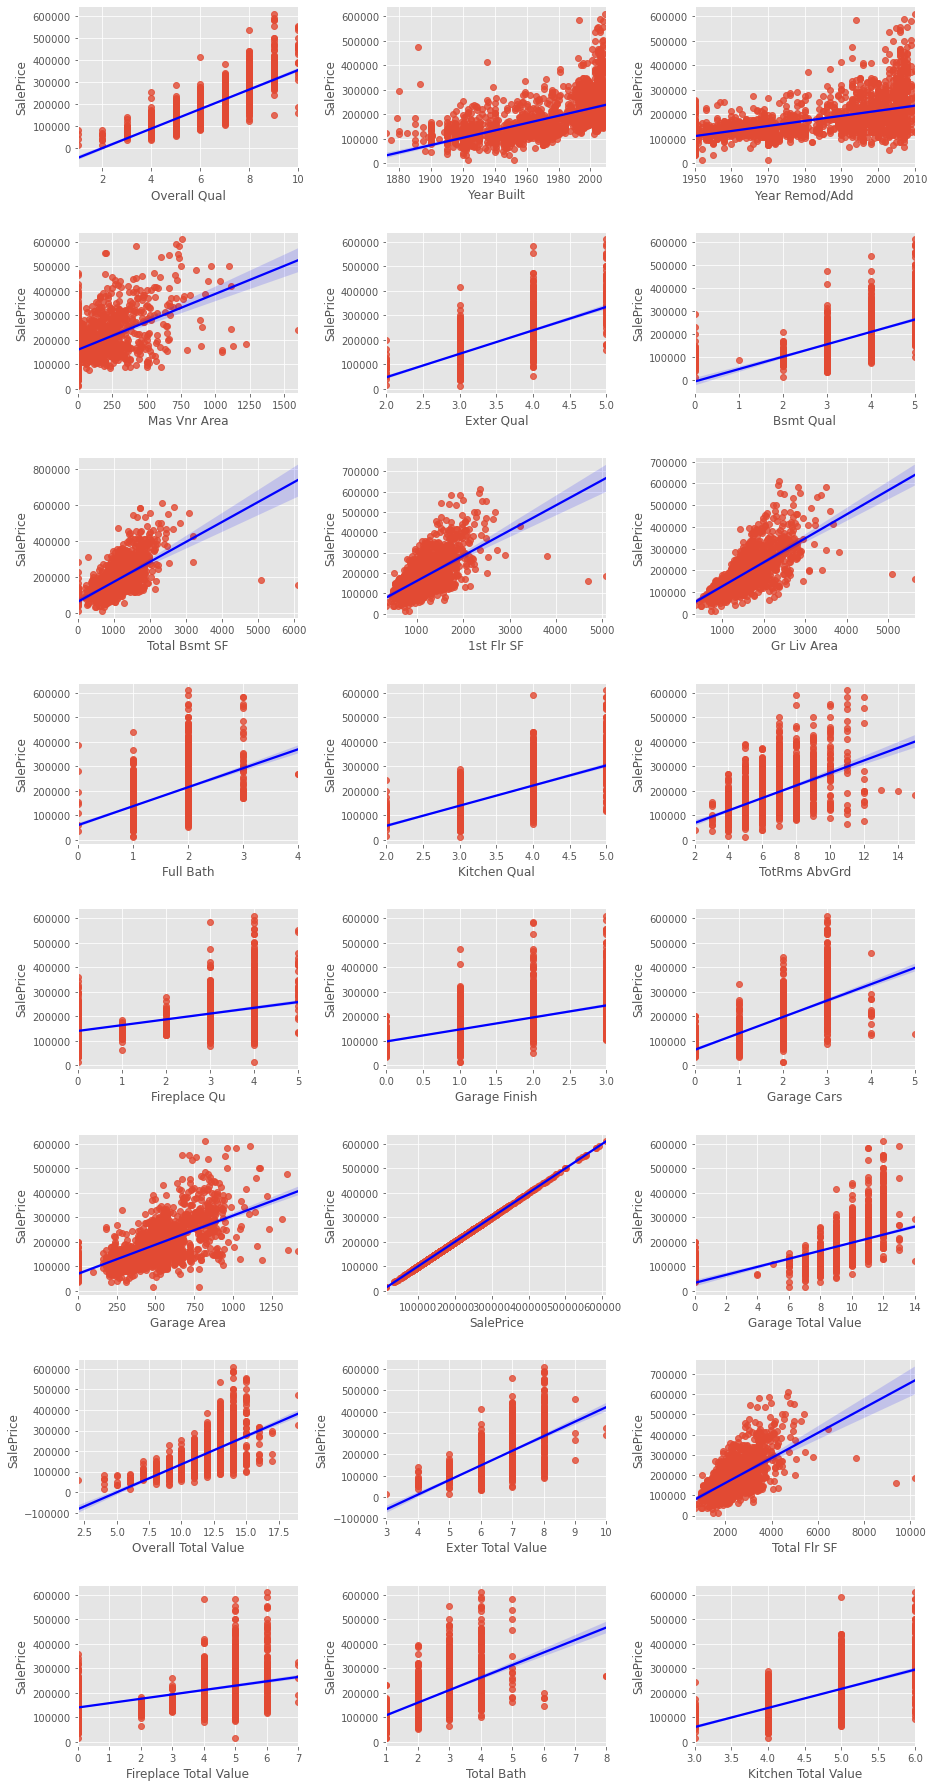

In [166]:
subplot_scatter(xcolumns = num_df, xlabels = num_df) # plotting data with high positive or negative corr with SalePrice

### 5.2.1 comments on plots:
- Noticeable outliers in a few graphs
- will eliminate the outliers for better plots
- should have a better solution then removing.

## 5.2.2 Removal of Outliers

In [167]:
z = np.abs(stats.zscore(df_train_clean[num_df]))
z

array([[0.0786441 , 0.14222744, 0.98947881, ..., 0.99013817, 0.59622006,
        0.66341574],
       [0.62265614, 0.80512594, 0.60909015, ..., 0.69201001, 1.65864172,
        0.66341574],
       [0.77994434, 0.62010583, 1.08457597, ..., 0.99013817, 0.46620161,
        0.66341574],
       ...,
       [0.0786441 , 1.44872896, 1.62569321, ..., 0.69201001, 0.46620161,
        0.84508279],
       [1.48124458, 0.52067106, 1.34040172, ..., 1.5330841 , 0.46620161,
        0.84508279],
       [0.62265614, 0.90456072, 0.70418731, ..., 0.69201001, 0.59622006,
        0.66341574]])

In [168]:
threshold = 4
np.where(z> threshold);

In [169]:
df_train_clean.shape

(2051, 44)

In [170]:
df_train_clean = df_train_clean[(z<threshold).all(axis=1)]
df_train_clean.shape

(2000, 44)

- Removed 51 rows, not too drastic considering the data size is 2051

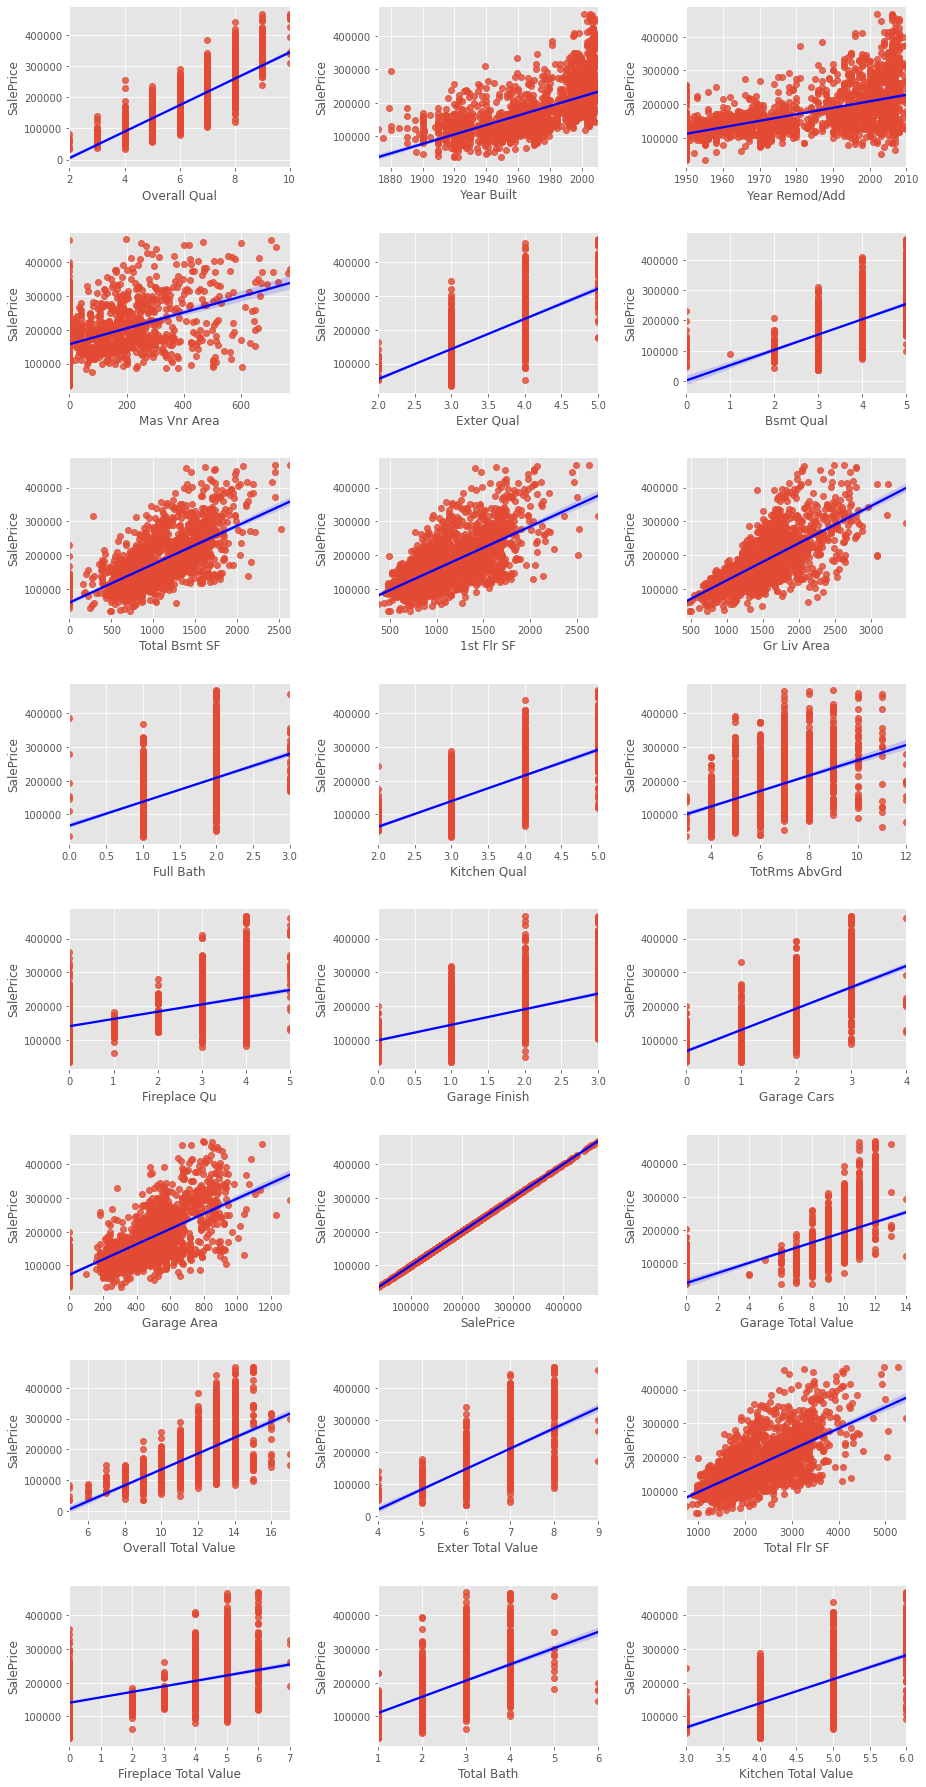

In [171]:
subplot_scatter(xcolumns = num_df, xlabels = num_df, dataframe = df_train_clean) 
# plotting data with high positive or negative corr with SalePrice

## 5.2.2 comments 
- No visible outliers is noticed
- data looks correlated to sale price and will be used for model

## 5.2.2 Sorting Object Dtypes

In [172]:
obj_data = df_train_clean.select_dtypes(['object']).keys()
print(len(obj_data))
obj_data

19


Index(['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Heating', 'Garage Type', 'Misc Feature', 'Sale Type'], dtype='object')

In [173]:
df_train_clean_obj = df_train_clean.loc[:, obj_data]
df_train_clean_obj['SalePrice'] = df_train_clean['SalePrice'] #adding in saleprice column for obj dataframe
print(df_train_clean_obj.shape)
df_train_clean_obj.head()

(2000, 20)


,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Heating,Garage Type,Misc Feature,Sale Type,SalePrice
0,RL,Pave,NA,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,GasA,Attchd,NA,WD,130500
1,RL,Pave,NA,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,GasA,Attchd,NA,WD,220000
2,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,GasA,Detchd,NA,WD,109000
3,RL,Pave,NA,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,GasA,BuiltIn,NA,WD,174000
4,RL,Pave,NA,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,GasA,Detchd,NA,WD,138500


In [174]:
def subplot_boxplot(xcolumns, xlabels, dataframe = df_train_clean):
    nrows = int(np.ceil(len(xcolumns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.boxplot(x = column, y = 'SalePrice', ax = ax[i], data = dataframe) #plot Scatter plot for each data
        
        medians = dataframe.groupby(column)['SalePrice'].median().values # Calculate number of obs per group & median to position labels
        nobs = dataframe[column].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
        
        pos = range(len(nobs))
        for tick,label in zip(pos,ax[i].get_xticklabels()):
            ax[i].text(pos[tick], medians[tick] + 0.03, nobs[tick],
                    horizontalalignment='center', size='medium', color='r', weight='semibold')

        
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45);

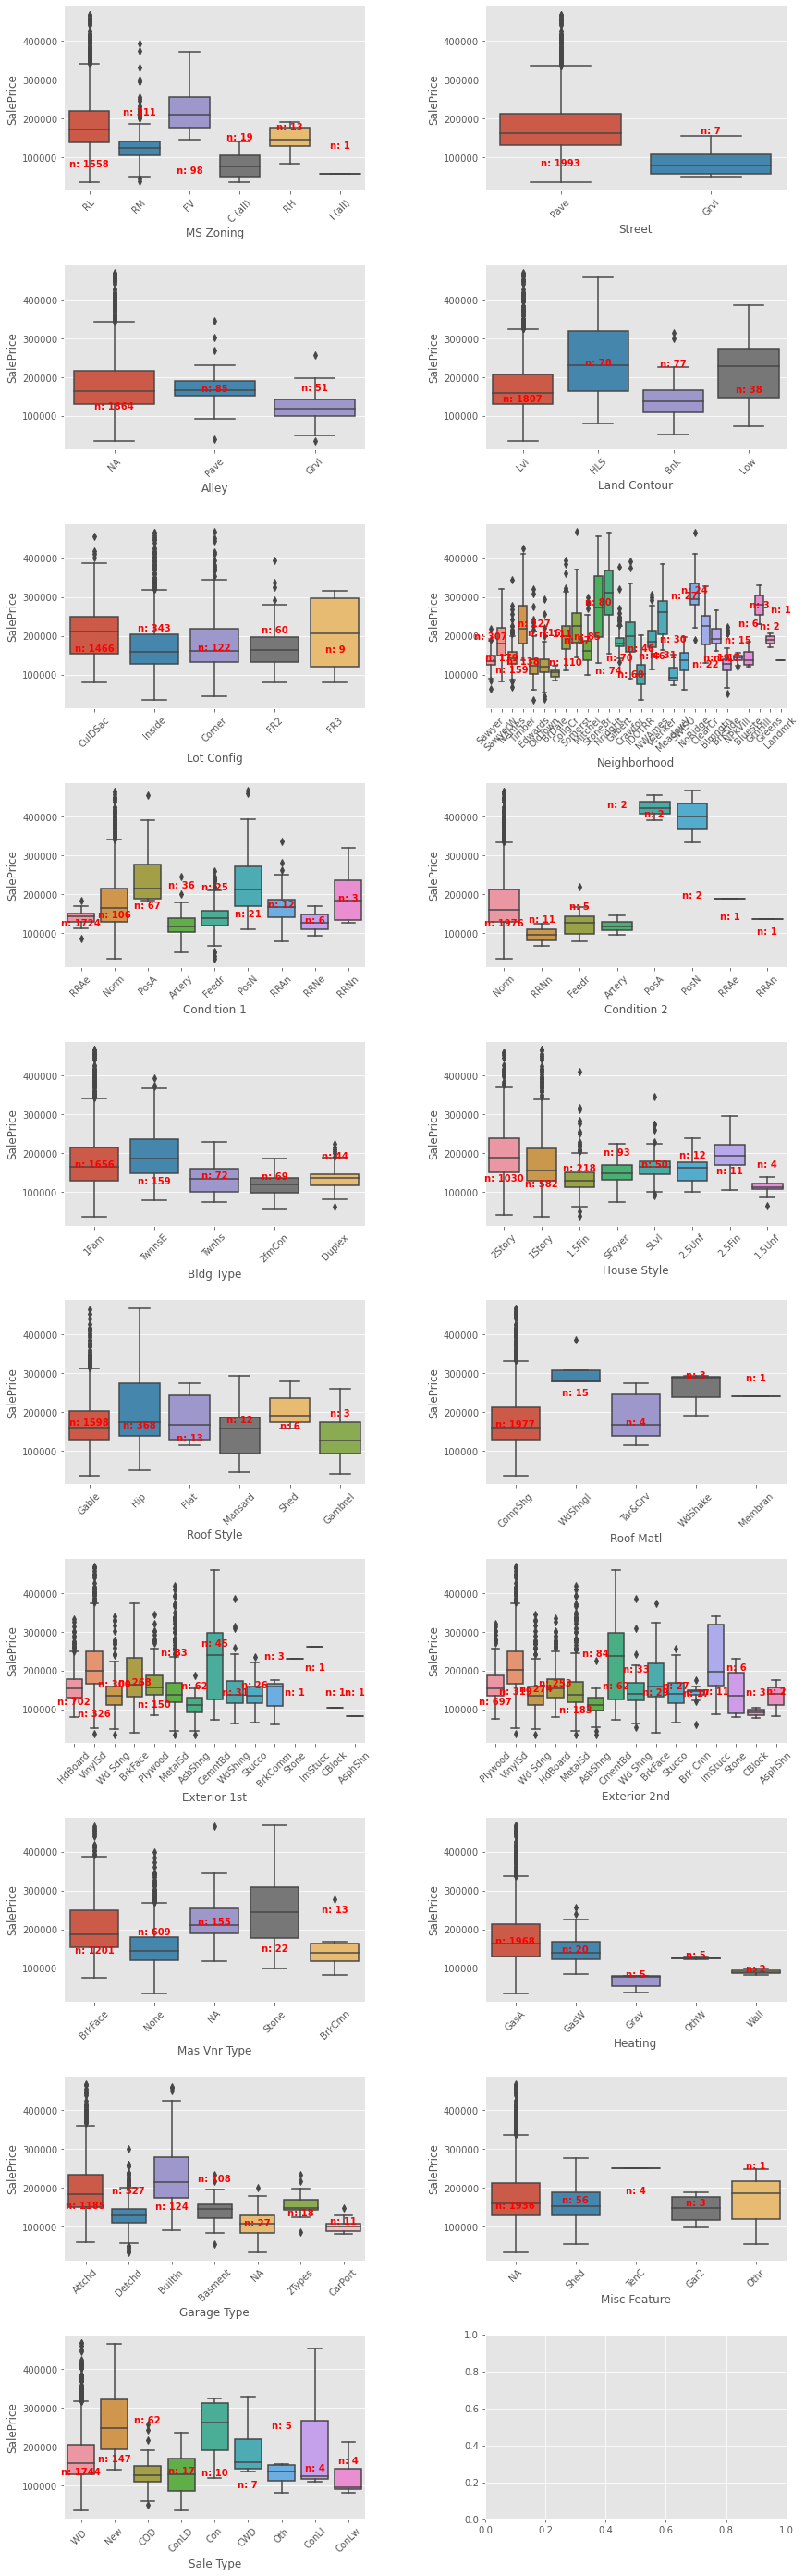

In [175]:
subplot_boxplot(xcolumns = obj_data, xlabels = obj_data)

## 5.2.2 comments:
To be removed:
- Alley
- Street
- MS Zoning
- Misc Feature
- Mas Vnr Type
- Exterior 2nd

In [176]:
# dropping redundant datas
box_to_drop = ['Alley', 'Street', 'MS Zoning', 
               'Misc Feature', 'Mas Vnr Type',
               'Exterior 2nd'] # 6 columns removed
df_train_clean.drop(columns=box_to_drop,inplace = True) #6 columns removed 

df_test_clean.drop(columns=box_to_drop,inplace = True) #6 columns removed 

df_train_clean.shape, df_test_clean.shape

C:\Users\Sim Yi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((2000, 38), (879, 38))

In [177]:
df_train_clean.columns

Index(['Id', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', 'Heating', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Sale Type', 'SalePrice', 'Garage Total Value', 'Overall Total Value', 'Exter Total Value', 'Total Flr SF', 'Fireplace Total Value', 'Total Bath', 'Kitchen Total Value'], dtype='object')

In [178]:
#26 columns left after EDA

#export dataset for further evaluation
df = pd.concat([df_train_clean, df_test_clean], ignore_index=False, sort=False, axis = 0)
print(df.shape)

df.to_csv("../datasets/AHD_EDA.csv", index=False)

(2879, 38)


## to be continued to Preprocessing and Feature Engineering